In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

##Loading Model

In [27]:
model  = tf.keras.models.load_model('/content/drive/MyDrive/plant_disease_detection_model.keras')

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 720)            │     1,080,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        27,398 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,681,528 (101.78 MB)

 Trainable params: 8,893,842 (33.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,787,686 (67.85 MB)

In [29]:
!mkdir -p /content/plant_disease
!unzip -q /content/drive/MyDrive/archive.zip -d /content/plant_disease

replace /content/plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Visualizing Single image of test set

In [47]:
import cv2
import_path = "/content/plant_disease/test/test/PotatoEarlyBlight2.JPG"

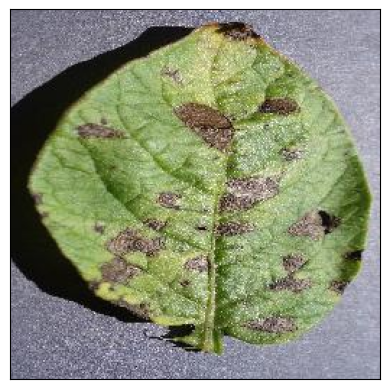

In [48]:
img = cv2.imread(import_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# displaying image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model on test set

In [49]:
image = tf.keras.preprocessing.image.load_img(import_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

input_arr.shape

(1, 128, 128, 3)

In [50]:
prediction = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [51]:
prediction,prediction.shape

(array([[1.3972150e-10, 7.2221614e-14, 2.6738149e-13, 5.8362625e-13,
         1.0060528e-12, 4.3921918e-14, 4.9846767e-16, 2.3466099e-12,
         1.8476202e-13, 6.6135750e-14, 2.1088814e-17, 1.9562018e-16,
         1.7041666e-17, 9.9513063e-13, 6.1231668e-17, 1.2550091e-14,
         7.6982955e-14, 3.1386267e-19, 4.8507303e-13, 4.2198207e-15,
         1.0000000e+00, 1.2349066e-10, 8.7768510e-14, 8.0019719e-17,
         2.8405732e-16, 6.6683237e-13, 2.4306272e-11, 3.1969941e-14,
         2.2547299e-15, 2.8341264e-13, 1.0351137e-08, 1.3001217e-13,
         2.4330987e-08, 1.5228464e-16, 4.1259229e-15, 4.0028523e-18,
         1.2988915e-18, 3.9103790e-11]], dtype=float32),
 (1, 38))

In [52]:
result_index = np.argmax(prediction)
result_index

np.int64(20)

In [53]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

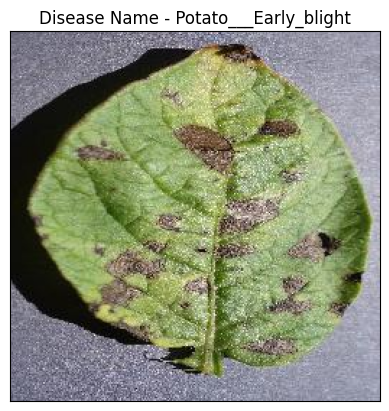

'Potato___Early_blight'

In [55]:
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name - {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
model_prediction